In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
image=cv2.imread('signs_vehicles_xygrad.png')
#image=cv2.imread('test_images/straight_lines1.jpg')
#image=cv2.imread('test_images/straight_lines2.jpg')
#image=cv2.imread('test_images/test1.jpg')
#image=cv2.imread('test_images/test2.jpg')
#image=cv2.imread('test_images/test3.jpg')
#image=cv2.imread('test_images/test4.jpg')
#image=cv2.imread('test_images/test5.jpg')
#image=cv2.imread('test_images/test6.jpg')
#image=cv2.imread('test6.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def abs_sobel_thresh(image, orient='x', sobel_kernel=5, thresh=(0, 255)):
    # Calculate directional gradient
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output
    


def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx=(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel))
    sobely=(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel))
    # 3) Calculate the magnitude 
    sob_power=np.sqrt(sobelx**2+sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    sob_scale=np.uint8(255*sob_power/np.max(sob_power))
    # 5) Create a binary mask where mag thresholds are met
    binary_output=np.zeros_like(sob_scale)
    # 6) Return this mask as your binary_output image
    binary_output[(sob_scale>mag_thresh[0])&(sob_scale<mag_thresh[1])]=1# Remove this line
    return binary_output
    
    
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    absx=np.absolute(sobelx)
    absy=np.absolute(sobely)
    
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    magnitude=np.absolute(np.arctan2(absy,absx))
    
   
    
    #magnitude = cv2.fastNlMeansDenoising(magnitude,7,21,1)
    #magnitude=cv2.GaussianBlur(magnitude,(5,5),1)
    
    
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output=np.zeros_like(magnitude)
    # 6) Return this mask as your binary_output image
    binary_output[(magnitude>thresh[0])&(magnitude<thresh[1])]=1# Remove this line
    
    return binary_output
    # Calculate gradient direction
    # Apply threshold
    

# Choose a Sobel kernel size
ksize = 11 # Choose a larger odd number to smooth gradient measurements


gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=5, thresh=(30, 80))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=5, thresh=(40, 80))
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(50, 100))
dir_binary = dir_threshold(image, sobel_kernel=9, thresh=(0.7, 1.3))

gradxn = ~gradx
gradyn = ~grady
mag_binaryn = ~mag_binary
dir_binaryn =  ~np.uint8(255*dir_binary/np.max(dir_binary))

Denoise=mag_binaryn
Denoise=cv2.fastNlMeansDenoising(mag_binary,None,15,21,7)


combined = np.zeros_like(dir_binary)
#combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
combined[((dir_binary == 1) &(gradx == 1) ) | ((grady == 1)& (dir_binary == 1)) | ((Denoise == 1)&(dir_binary == 1))] = 1



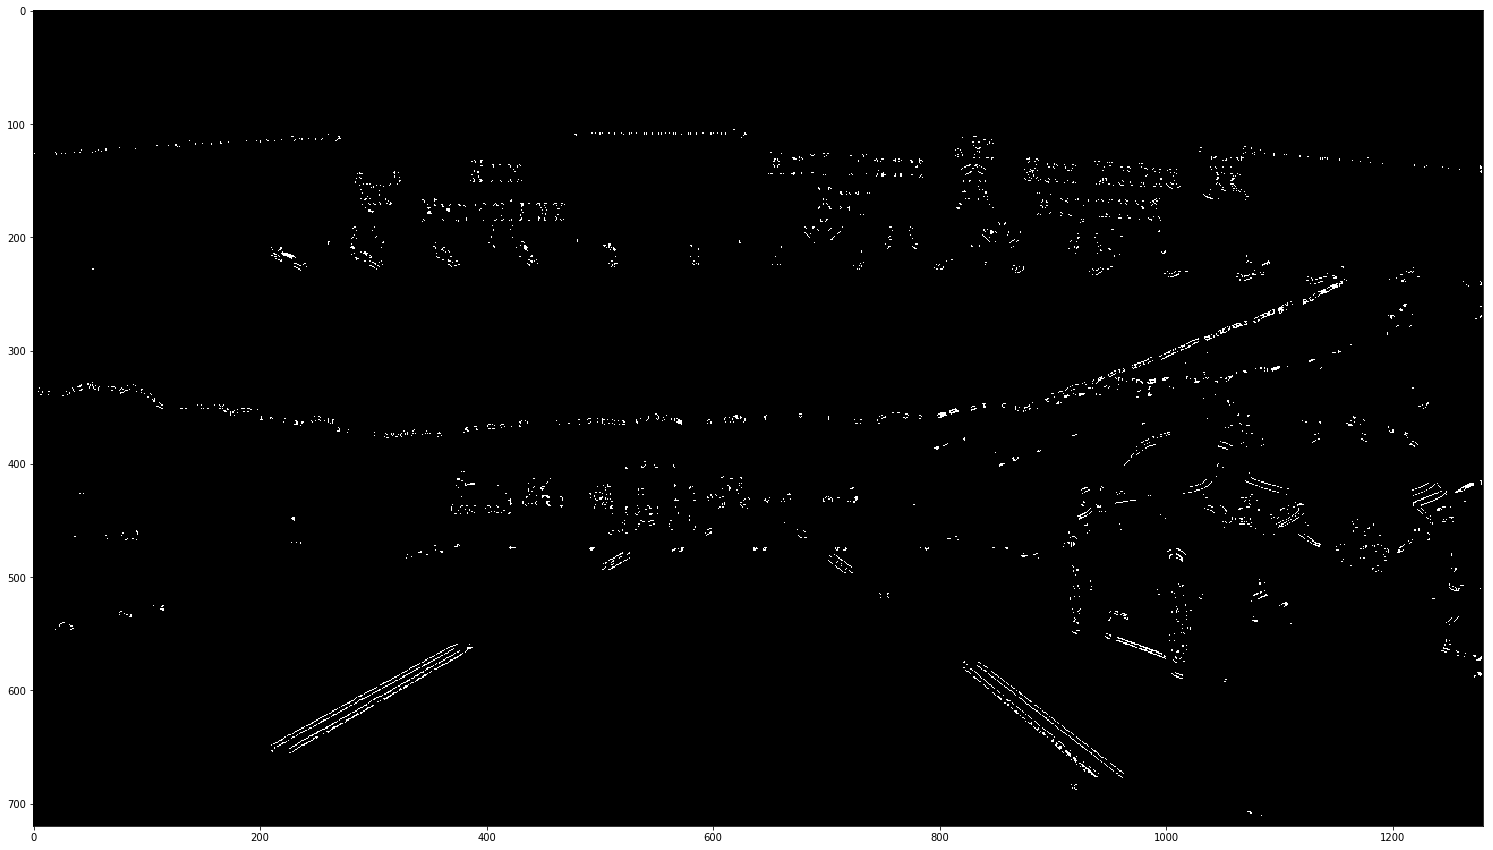

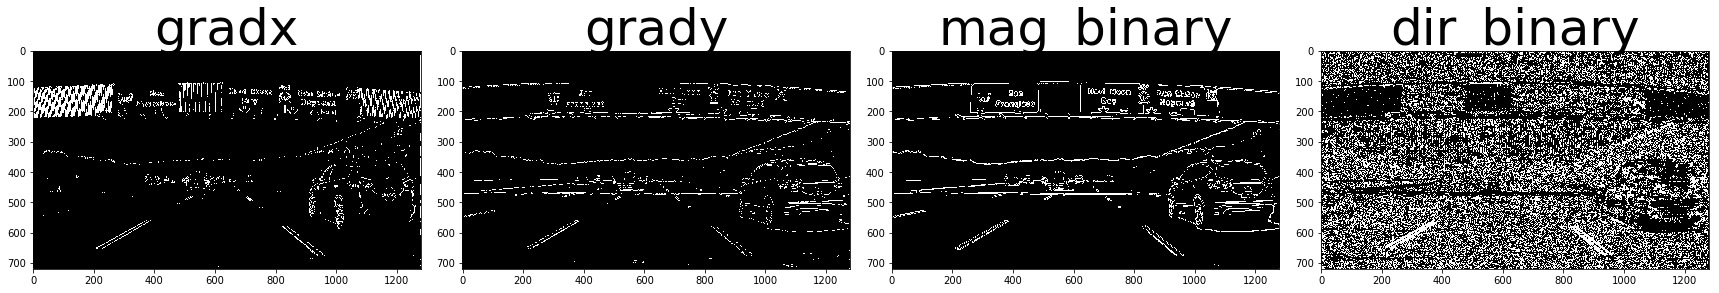

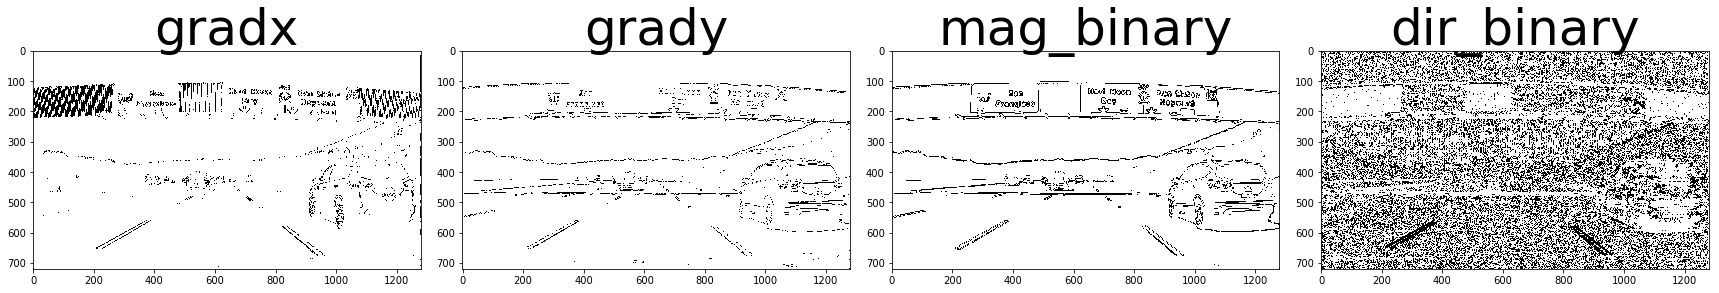

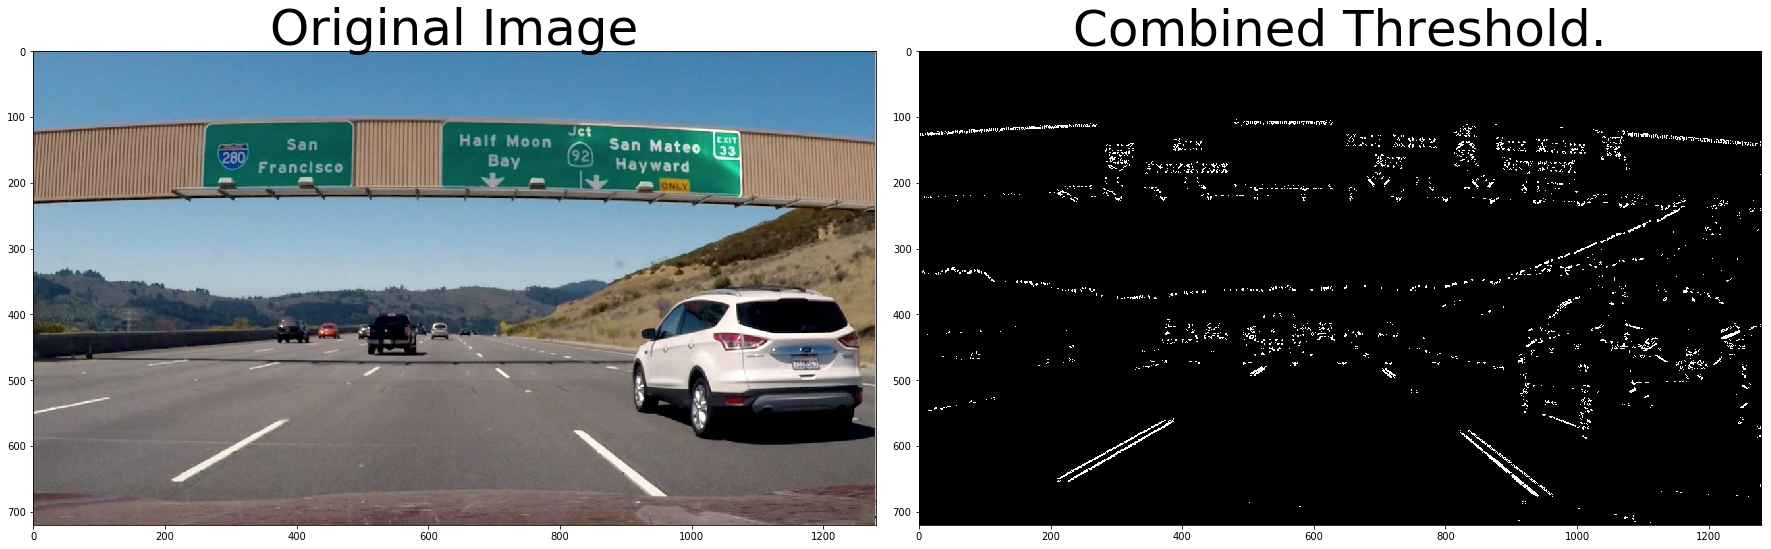

In [4]:
plt.figure(figsize=(30,15))

plt.imshow(~(dir_binaryn|gradx)&mag_binary,cmap='gray')

f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(24, 15))
f.tight_layout()
ax1.imshow(gradx,cmap='gray')
ax1.set_title('gradx', fontsize=50)
ax2.imshow(grady, cmap='gray')
ax2.set_title('grady', fontsize=50)
ax3.imshow(mag_binary,cmap='gray')
ax3.set_title('mag_binary', fontsize=50)
ax4.imshow(dir_binary,cmap='gray')
ax4.set_title('dir_binary',fontsize=50)

f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(24, 15))
f.tight_layout()
ax1.imshow(gradxn,cmap='gray')
ax1.set_title('gradx', fontsize=50)
ax2.imshow(gradyn, cmap='gray')
ax2.set_title('grady', fontsize=50)
ax3.imshow(mag_binaryn,cmap='gray')
ax3.set_title('mag_binary', fontsize=50)
ax4.imshow(dir_binaryn,cmap='gray')
ax4.set_title('dir_binary',fontsize=50)






f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combined Threshold.', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

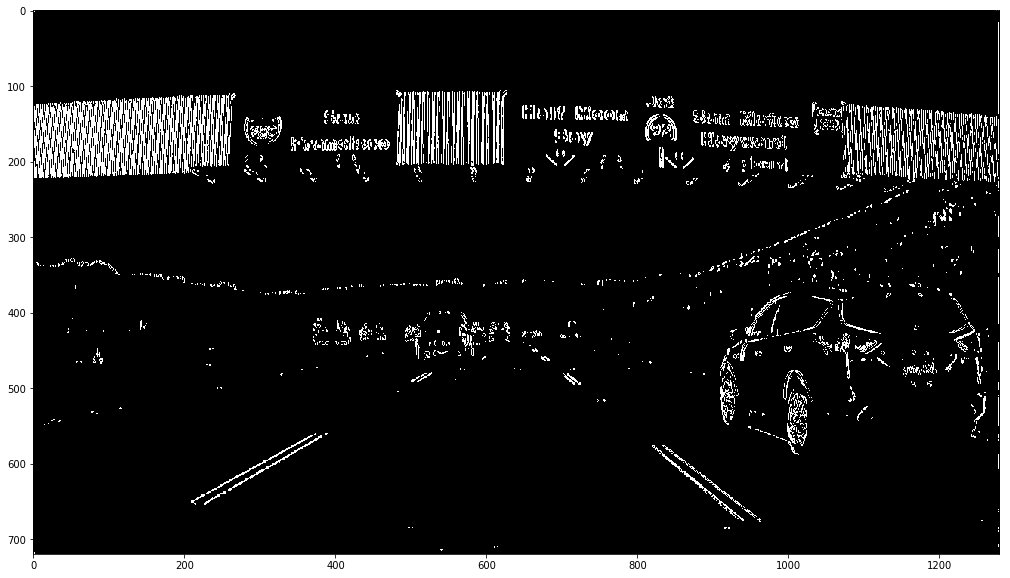

In [5]:
plt.figure(figsize=(20,10))
plt.imshow(((gradx == 1)  + ((grady == 1)) + ((mag_binary == 1)))&(gradx==1),cmap='gray')

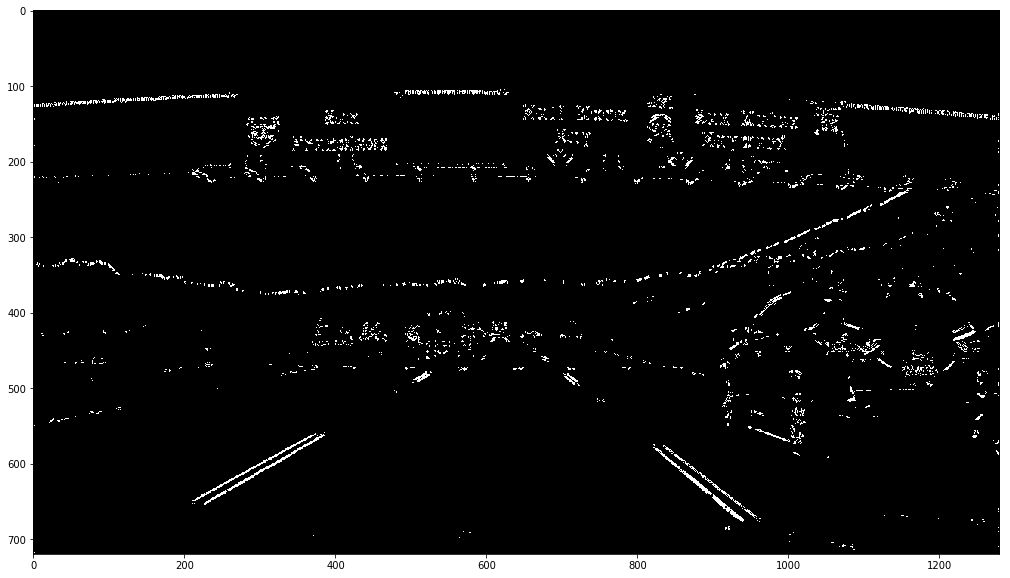

In [6]:
plt.figure(figsize=(20,10))

combinedd=np.uint8(255*combined/np.max(combined))

Denoise=cv2.fastNlMeansDenoising(combinedd,None,10,35,17)
plt.imshow(combined,cmap='gray')